# РАЗДЕЛ 4. Финальная модель

В качестве финальной модели выберем полносвзную нейронную сеть.
Построим и сохраненим финальную модель

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Dense
import pickle
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Подготовка данных для обучения
path_1 = r'./Data/X.xlsx'
X = pd.read_excel(path_1,index_col=0)
X.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0


In [3]:
path_2 = r'./Data/y.xlsx'
y = pd.read_excel(path_2,index_col=0)
y1 = y.drop(columns='Прочность при растяжении, МПа')
y2 = y.drop(columns='Модуль упругости при растяжении, ГПа')
y2.head()

,"Прочность при растяжении, МПа"
0,3000.0
1,3000.0
2,3000.0
3,3000.0
4,3000.0


In [6]:
# кодирование признака "Угол нашивки, град"
le = LabelEncoder()
X_le = X.copy()

X_le['Угол нашивки, град'] = le.fit_transform(X_le['Угол нашивки, град'])
X_le.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0


In [7]:
# стандартизация  данных
scaler_std = StandardScaler()
scaler_std.fit(X_le)
Xstd = pd.DataFrame (data =scaler_std.transform(X_le), columns=X_le.columns)
scaler_std_y = StandardScaler()
scaler_std_y.fit(y)
ystd = pd.DataFrame (data = scaler_std_y.transform(y), columns=y.columns)

In [9]:
#разбиение данных на тестовую и тренировочную часть
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(Xstd,ystd, test_size=0.2, random_state=42, shuffle=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                192       
                                                                 
 dense_22 (Dense)            (None, 32)                544       
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 - 0s - loss: 1.0470 - mae: 0.8185 - val_loss: 1.0375 - val_mae: 0.7934 - 498ms/epoch - 22ms/step
Epoch 2/100
23/23 - 0s - loss: 1.0213 - mae: 0.8073 - val_loss: 1.0342 - val_mae: 0.7920 - 43ms/epoch - 2ms/step
Epoch 3/100
23/23 - 0s - loss: 1.0172 - mae: 0.8057 - val_loss: 1.0330 - val_mae: 0.7924 - 4

Epoch 66/100
23/23 - 0s - loss: 0.9936 - mae: 0.7986 - val_loss: 1.0216 - val_mae: 0.7964 - 37ms/epoch - 2ms/step
Epoch 67/100
23/23 - 0s - loss: 0.9944 - mae: 0.7985 - val_loss: 1.0238 - val_mae: 0.7975 - 37ms/epoch - 2ms/step
Epoch 68/100
23/23 - 0s - loss: 0.9981 - mae: 0.7992 - val_loss: 1.0250 - val_mae: 0.7988 - 37ms/epoch - 2ms/step
Epoch 69/100
23/23 - 0s - loss: 0.9933 - mae: 0.7985 - val_loss: 1.0177 - val_mae: 0.7931 - 37ms/epoch - 2ms/step
Epoch 70/100
23/23 - 0s - loss: 0.9944 - mae: 0.7991 - val_loss: 1.0265 - val_mae: 0.7994 - 37ms/epoch - 2ms/step
Epoch 71/100
23/23 - 0s - loss: 0.9925 - mae: 0.7979 - val_loss: 1.0202 - val_mae: 0.7953 - 37ms/epoch - 2ms/step
Epoch 72/100
23/23 - 0s - loss: 0.9937 - mae: 0.7990 - val_loss: 1.0234 - val_mae: 0.7977 - 38ms/epoch - 2ms/step
Epoch 73/100
23/23 - 0s - loss: 0.9933 - mae: 0.7982 - val_loss: 1.0204 - val_mae: 0.7951 - 41ms/epoch - 2ms/step
Epoch 74/100
23/23 - 0s - loss: 0.9931 - mae: 0.7987 - val_loss: 1.0251 - val_mae: 0.799

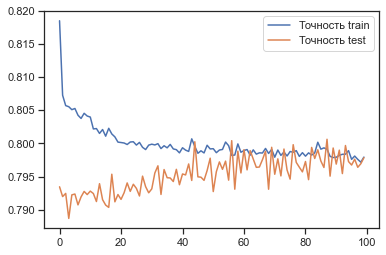

In [23]:
# модель полносвязной нейронной сети для целевого параметра y1 и y2 тренируем на стандартизованных  данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(2, activation = 'linear'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_std,y_train_std, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [24]:
y_pred = modelNN_y1.predict(X_test_std)
y_pred = scaler_std_y.inverse_transform (y_pred)
MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAENN_1)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENN_2)

7/7 [==============================] - 0s 831us/step
2.4465849251778673
359.7758150297231


In [34]:
# Сохранение модели нейронной сети
modelNN_y1.save(r'./ML_Model/')


INFO:tensorflow:Assets written to: ./ML_Model/assets


In [35]:
#  Сохранение StandartScaler
with open(r'./ML_Model/scaler_std.pkl', 'wb') as f:
    pickle.dump(scaler_std,f)
with open(r'./ML_Model/scaler_std_y.pkl', 'wb') as f:
    pickle.dump(scaler_std_y,f)

## Проверка сохраненных моделей

In [38]:
# загрузка модели
loaded_model = models.load_model(r'./ML_Model/')
with open(r'./ML_Model/scaler_std.pkl', 'rb') as f:
    scaler_std_1 = pickle.load(f)
with open(r'./ML_Model/scaler_std_y.pkl', 'rb') as f:
    scaler_std_y_1 = pickle.load(f)

In [69]:
X_pred = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 0.0, 1.0, 2.0]
X_pred1 = np.array(X_pred).reshape(-1,11)
X_pred_std = scaler_std.transform(X_pred_1)
#X_pred_std = scaler_std.transform(X_pred_1)
y_pred_std= loaded_model.predict(X_pred_std)
y_pred = scaler_std_y.inverse_transform(y_pred_std)
print(y_pred)
y_pred_1 = y_pred[0,0]
y_pred_2 = y_pred[0,1]
print(y_pred)

1/1 [==============================] - 0s 22ms/step
[[  73.10121 2718.3918 ]]
[[  73.10121 2718.3918 ]]


###### Выводы к разделу 4
1. Наилучшие результаты предсказания свойств композитных матералов показала полносвязная нейронная сеть имеющая следующую архитектуру:
    - входной слой (11 входов)
    - 1 скрытый слой (16 нейронов)
    - 2 скрытый слой (32 нейрона)
    - выходной слой (2 нейрона)
2. Наилучшие результаты модель показала на стандартизованных данных при кодировании признака "Угол нашивки, град".
3. Точность модели оценивалось средней абсолютной ошибкой (mae).
4. Точность  модель составила:
                - для целевого признака "Модуль упругости при растяжении, ГПа", средняя абсолютная ошибка  2,4466
                - для целевого признака "Прочность при растяжении, МПа", средняя абсолютная ошибка  359,77 )
